## Basic Example

In [1]:
!pip install qiskit qiskit_ionq matplotlib pylatexenc

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 32.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.2 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [2]:
from qiskit import QuantumCircuit
import qiskit_ionq

from getpass import getpass

# get your API key from https://cloud.ionq.com/settings/keys
api_key = getpass('Enter your IonQ API key: ')
provider = qiskit_ionq.IonQProvider(api_key)
backend = provider.get_backend('ionq_simulator')

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

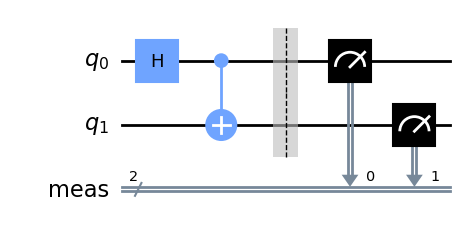

In [4]:
qc.draw('mpl')

In [5]:
job = backend.run(qc)
print(job.result().get_counts())

{'00': 518, '11': 506}


## Advanced Example

In [6]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit_ionq import ErrorMitigation
from math import pi

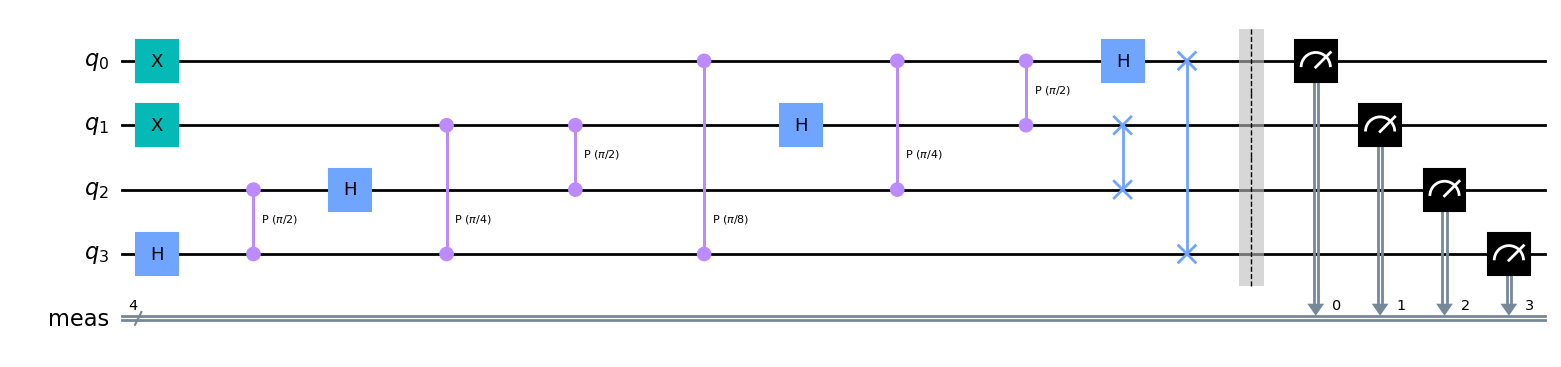

In [7]:
num_qubits = 4
qc_adv = QuantumCircuit(num_qubits, name='QFT Example')
qc_adv.x(range(num_qubits // 2))
qc_adv.append(QFT(
    num_qubits=num_qubits,
    approximation_degree=0,
    do_swaps=True,
    inverse=False,
    insert_barriers=False,
    name='qft'), range(num_qubits))
qc_adv.measure_all()
qc_adv = transpile(qc_adv, backend) # decompose qft into gates
qc_adv.draw('mpl')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/qiskit_ionq/ionq_backend.py:374: UserWarning: Option error_mitigation is not used by this backend
  return super().run(circuit, **kwargs)


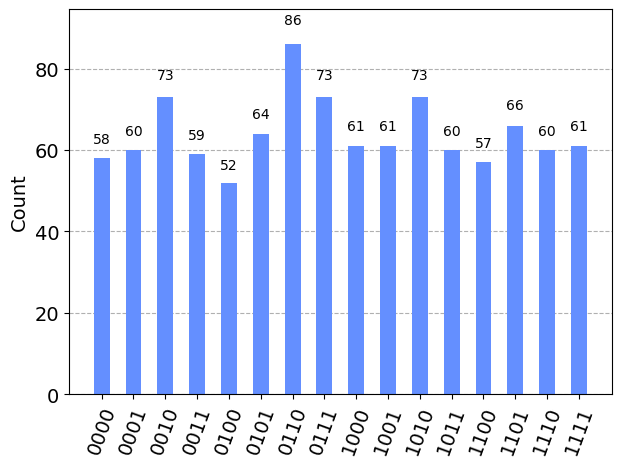

In [8]:
job_adv = backend.run(
    qc_adv,
    noise_model='harmony',
    error_mitigation=ErrorMitigation.DEBIASING,
)
plot_histogram(job_adv.result(sharpen=True).get_counts())